# Jon Williamson

## Preprocessing




In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [84]:
df = pd.read_csv('mf_imputed_master_data.csv', index_col=0)
#df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.458280,-1
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [86]:
df = df[df['Coach Tenure Class'] != -1]
"""
temp_df = df.iloc[:,2:76].join(df.iloc[:,142:-2])
print(temp_df.head(5))
"""
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,47,0,0,0,0,12,0,0,0.481609,0.556739,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.000000
2,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.000000
3,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.000000
4,44,0,8,0,12,0,0,0,0.566892,0.515088,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.000000
5,25,0,0,0,0,0,0,0,0.496432,0.404820,...,0.414099,-0.401149,0.224804,-0.426724,-0.090500,-0.308254,-0.066786,-0.439158,0.138324,0.276597


In [87]:
y.head(5)

Unnamed: 0
1    1
2    1
3    0
4    0
5    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into three classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5+</td>
    <td class="tg-0pky">2</td>
  </tr>
</tbody>
</table>

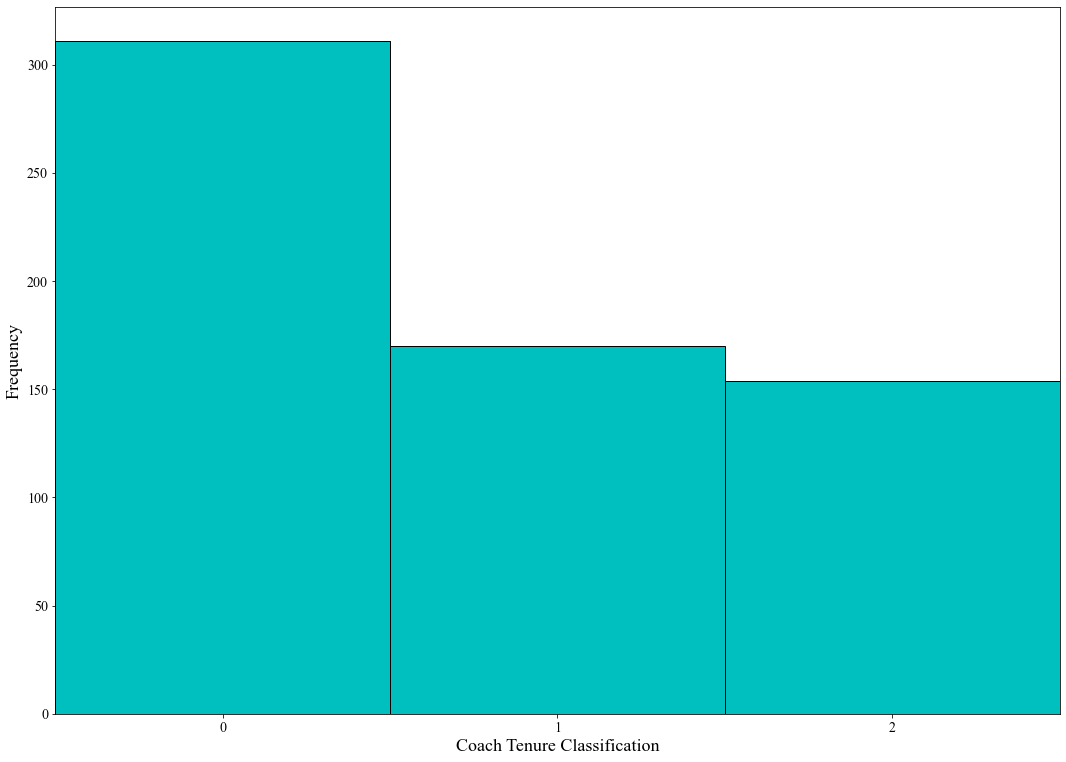

In [88]:
#rcParams['figure.figsize'] = 9, 6.5
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5], color='c', edgecolor='k')
plt.xlim(-0.5,2.5)
plt.xticks(ticks=[0,1,2])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

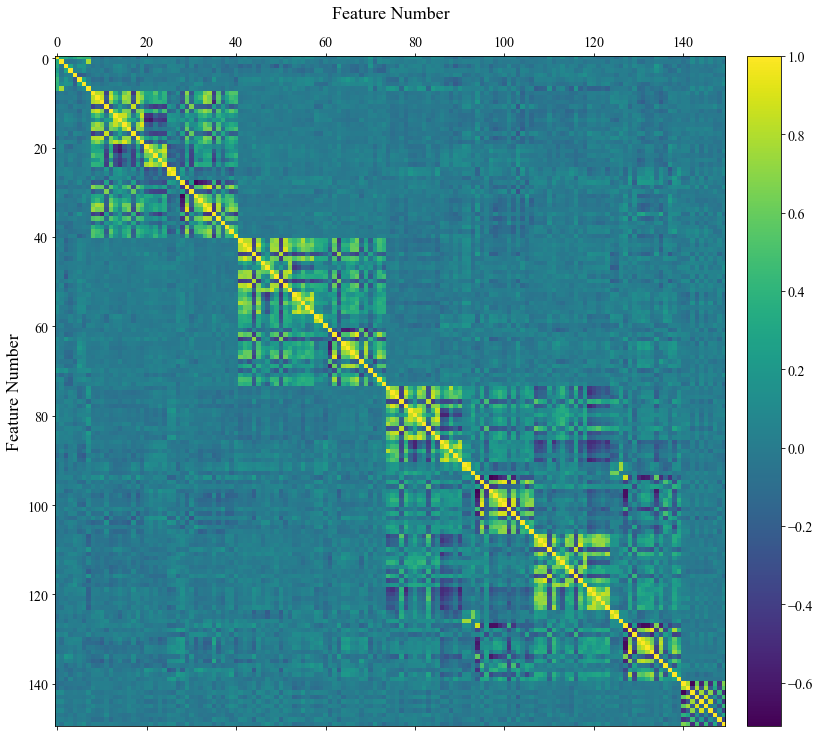

In [89]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, stratify=y, random_state=42)

In [91]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [92]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    #plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
    plt.xlabel('Feature No.')
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()

## Model 2: XGBoost Classifier

Necessary Imports:

In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [94]:
"""
xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100, 200],
    "learning_rate":    [.01, .05, .1, .2],
    "max_depth":        [2, 4, 6, 8, 10],
    "gamma":            [0, .001, .01, .1],
    "reg_lambda":       [0, .01, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100],
    "learning_rate":    [.1, .2, .3, .4],
    "max_depth":        [2, 3, 4],
    "gamma":            [0, .01],
    "reg_lambda":       [0, .01] 
}

xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBClassifier(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.8s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.4s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.0s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   42.1s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.7s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.5s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.8s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.7s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   42.1s finished


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   41.6s finished


In [95]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score']), np.mean(xgbr_result_dict['test_score'])))

Average Train AUROC: 1.000
Average Test AUROC: 0.739


In [96]:
xgbr_best_params_dict

{'n_estimators': [100, 100, 100, 50, 100, 100, 50, 100, 100, 100],
 'learning_rate': [0.4, 0.4, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.3, 0.3],
 'max_depth': [2, 3, 2, 3, 4, 3, 4, 4, 3, 4],
 'gamma': [0.01, 0, 0, 0.01, 0, 0.01, 0.01, 0, 0, 0.01],
 'reg_lambda': [0.01, 0.01, 0, 0, 0, 0, 0.01, 0, 0.01, 0.01]}

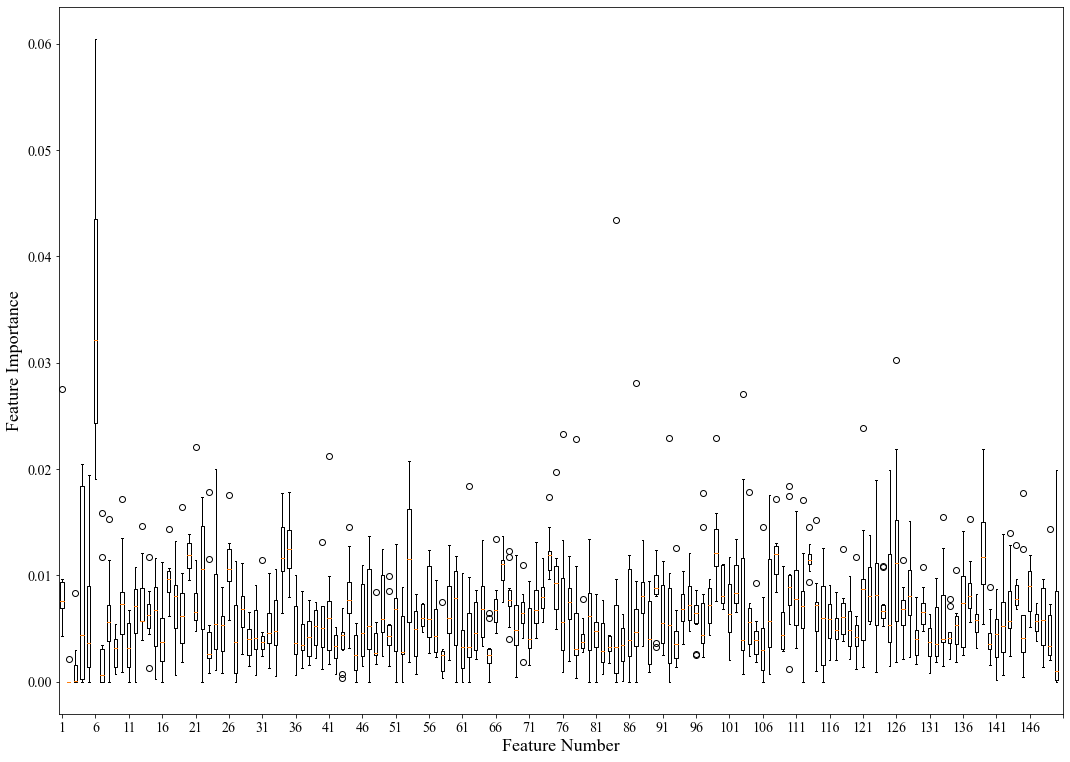

In [97]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [98]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 6, has an avg. importance of 0.0345 with a std. dev. of 0.0123.
Rank  2: Feature 99, has an avg. importance of 0.0129 with a std. dev. of 0.0041.
Rank  3: Feature 35, has an avg. importance of 0.0125 with a std. dev. of 0.0027.
Rank  4: Feature 34, has an avg. importance of 0.0123 with a std. dev. of 0.0032.
Rank  5: Feature 126, has an avg. importance of 0.0122 with a std. dev. of 0.0082.
Rank  6: Feature 139, has an avg. importance of 0.0122 with a std. dev. of 0.0045.
Rank  7: Feature 74, has an avg. importance of 0.0121 with a std. dev. of 0.0023.
Rank  8: Feature 108, has an avg. importance of 0.0119 with a std. dev. of 0.0023.
Rank  9: Feature 20, has an avg. importance of 0.0119 with a std. dev. of 0.0014.
Rank 10: Feature 113, has an avg. importance of 0.0116 with a std. dev. of 0.0013.
Rank 11: Feature 26, has an avg. importance of 0.0111 with a std. dev. of 0.0030.
Rank 12: Feature 53, has an avg. importance of 0.0109 with a std. dev. of 0.0063.
Rank 13: Feat

The previously printed RMSE values show that the heavily cross-validated XGBoost has a better performance on both the testing and training sets within the cross validation. The performance on the test sets is quite remarkable at .938. This value is notable because the model was built using `GridSearchCV` with internal cross-validation. These results show that the model was able to create some generalizable functionality. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [99]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print(test_xgbr_best_params_dict)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train, y_train)
    plot_pred = xgbr.predict(X_test)

{'n_estimators': 100, 'learning_rate': 0.3, 'max_depth': 3, 'gamma': 0, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}


In [100]:
#xgbr.save_model('XGBC_best_params')

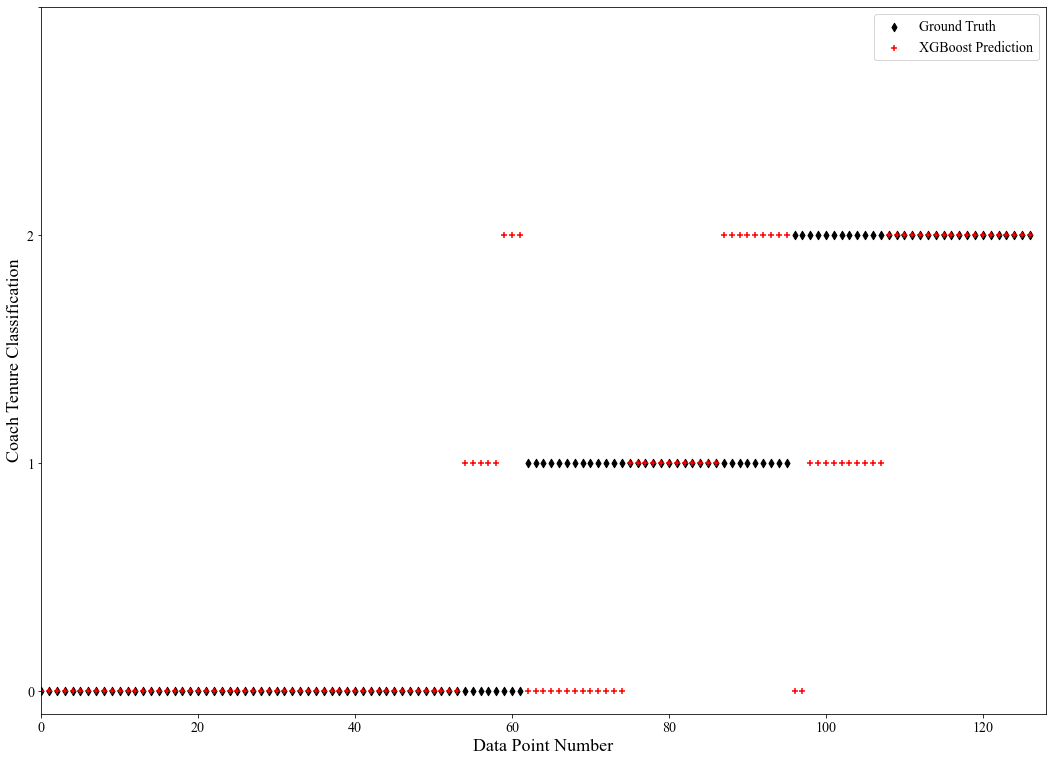

In [101]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [102]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test), average='macro', multi_class='ovr')))

Average AUROC: 0.828


The previous plot shows that the XGBoost model has an impressive AUROC of .674. This is better than the logistic regression model, which had an AUROC of .644 on the same held-out test set. These test results show some promise of predicitive value.

In [103]:
def print_predictions(mod, arr, tenure_list):
    integer_lookup_list = []
    count = 0
    probas = mod.predict_proba(arr)
    for tenure in mod.predict(arr):
        if tenure in tenure_list:
            integer_lookup_list.append((count, probas[count]))  
        count += 1
    return integer_lookup_list

In [104]:
df_ = pd.read_csv('master_data.csv', index_col=0)
df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(df_.shape)
df_.head(26)

(21, 154)


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.000000,-1
31,Ben Johnson,2025,39,0,1,0,0,4,3,0,...,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0,0.000000,-1
69,Brian Callahan,2024,40,0,0,0,0,3,5,0,...,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0,0.176471,-1
70,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.455882,-1
72,Brian Schottenheimer,2025,52,0,2,1,0,8,14,0,...,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0,0.000000,-1
133,Dan Quinn,2024,54,1,6,3,0,8,5,6,...,1.188696,-0.407393,0.337047,-0.828606,0.628450,-0.898061,0.866486,0.0,0.705882,-1
139,Dave Canales,2024,43,0,3,0,0,6,1,0,...,0.506368,-1.477273,-0.444299,-1.201064,-0.470088,-1.654772,-0.411087,0.0,0.294118,-1
145,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.588235,-1
320,Jim Harbaugh,2024,61,1,0,0,16,2,0,4,...,0.437967,0.316324,0.704380,-0.259284,1.062612,0.009139,-0.609940,1.0,0.647059,-1
388,Jonathan Gannon,2023,40,0,0,0,0,3,2,0,...,0.648922,0.161049,-0.061903,-0.511958,0.110017,0.196116,-0.356606,1.0,0.352941,-1


In [105]:
X_ = df_.iloc[:,2:-2]
y_ = df_.iloc[:,-1]
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
0,53,0,0,0,0,5,4,0,0.000000,0.000000,...,0.352941,-1.060228,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0
31,39,0,1,0,0,4,3,0,1.649025,1.737787,...,0.352941,-0.594120,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0
69,40,0,0,0,0,3,5,0,-0.183835,-0.355235,...,0.382353,-1.061871,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0
70,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
72,52,0,2,1,0,8,14,0,0.143263,-0.183343,...,0.558824,0.722236,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0


In [106]:
y_.head(5)

0    -1
31   -1
69   -1
70   -1
72   -1
Name: Coach Tenure Class, dtype: int64

In [107]:
from xgboost import XGBClassifier

best_xgbr_param_dict = {
    "n_estimators":     25,
    "learning_rate":    .3,
    "max_depth":        3,
    "gamma":            .1,
    "reg_lambda":       0
}

default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

best_xgbr_param_dict.update(default_xgbr_params)
print(best_xgbr_param_dict)

xgbr = XGBClassifier(**best_xgbr_param_dict).fit(X_train, y_train)
plot_pred = xgbr.predict(X_)
print(plot_pred)

{'n_estimators': 25, 'learning_rate': 0.3, 'max_depth': 3, 'gamma': 0.1, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}
[0 0 2 0 0 0 0 0 2 1 1 1 1 2 0 1 0 0 1 0 2]


In [108]:
count = 0
for index, probas in print_predictions(xgbr, X_, [0,1,2]):
    if df_.loc[X_.iloc[index].name]['Year'] >= 2022:
        print('{:<22} {:>4} {:>2} {} {}'.format(df_.loc[X_.iloc[index].name]['Coach Name'], df_.loc[X_.iloc[index].name]['Year'], df_.loc[X_.iloc[index].name]['Coach Tenure Class'], probas, plot_pred[count]))
    count += 1

Aaron Glenn            2025 -1 [0.60988325 0.25004938 0.14006735] 0
Ben Johnson            2025 -1 [0.45185384 0.30751106 0.24063511] 0
Brian Callahan         2024 -1 [0.16934316 0.28083184 0.549825  ] 2
Brian Daboll           2022 -1 [0.5183083  0.34462494 0.13706681] 0
Brian Schottenheimer   2025 -1 [0.49400133 0.38406968 0.12192902] 0
Dan Quinn              2024 -1 [0.40995416 0.40297872 0.18706714] 0
Dave Canales           2024 -1 [0.6043476  0.26941884 0.1262336 ] 0
DeMeco Ryans           2023 -1 [0.4497569 0.2396338 0.3106093] 0
Jim Harbaugh           2024 -1 [0.2215011  0.23812708 0.54037184] 2
Jonathan Gannon        2023 -1 [0.2716388  0.41199517 0.316366  ] 1
Kellen Moore           2025 -1 [0.35981262 0.5464954  0.09369195] 1
Kevin O'Connell        2022 -1 [0.29619548 0.37440303 0.3294015 ] 1
Liam Coen              2025 -1 [0.18295267 0.4709469  0.34610042] 1
Mike Macdonald         2024 -1 [0.13282378 0.15831932 0.7088569 ] 2
Mike McDaniel          2022 -1 [0.7025954  0.228885